# Webservice example

pycombina needs Python version >= 3.5 to work properly. However, certain applications require to use different versions of Python, or cannot use Python within their framework at all.

Therefore, pycombina contains an example of how to use Flask to make (yet, a subset of) pycombina's features accessible as a webservice, which can then be used from other versions of Python or from completely different frameworks. The usage is exemplified in the following.

## Start a webservice

The script file ```examples/webservice_example.py``` contains an example of how to make pycombina's features accessible via a webservice using Flask. Once the script is run, a demo webservice is started, which will be used in the upcoming demonstration.

By default, the service runs on ```localhost:6789```, POST requests can be sent to ```http://localhost:6789/api/solve/```.

## Solve a problem using the webservice

A binary approximation problem for a sample data set shall be solved using combinatorial integral approximation. The setup includes ``n_c = 1`` binary controls with ``n_b = 359`` values.

The first column of the file ``sample_data_2.csv`` contains the time points, the second column contains the relaxed binary values.

In [1]:
import numpy as np

data = np.loadtxt("sample_data_2.csv", skiprows = 1)

t = data[:,0]
b_rel = data[:-1,1]

In the following, the data set is visualized.

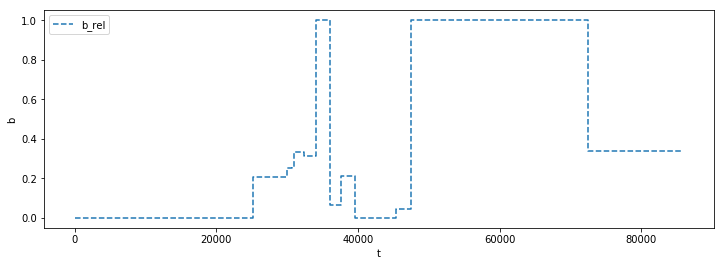

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,4))
plt.step(t[:-1], b_rel, label = "b_rel", color = "C0", linestyle = "dashed", where = "post")
plt.xlabel("t")
plt.ylabel("b")
plt.legend(loc = "upper left")
plt.show()

Now, we define a dictionary containing all problem information.  From the data shown above, it seems reasonable to also set a maximum switching constraint for the controls. For this, the key words of the corresponding functions of the problem and solver classes can be used.

In [3]:
import requests

service_address = "http://localhost:6789/api/solve/"

problem_definition = {

    "t": t.tolist(),
    "b_rel": b_rel.tolist(),
    "off_state_included": False,
    "n_max_switches": [4],
    "solver": "CombinaBnB"
}

r = requests.post(service_address, json = problem_definition)
print("Status:", r.status_code)

Status: 200


The terminal running the webservice now shows the corresponding solver outputs. After the solution process has finished, we can inspect the solution returned by the webservice.

Errors: None
Solver: CombinaBnB
Solver status: Optimal solution found
Objective value: 1603.3298534939165


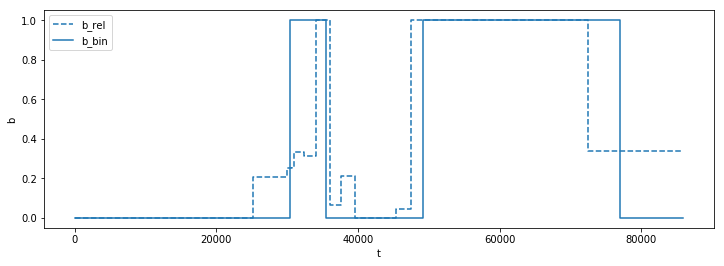

In [4]:
solution = r.json()
print("Errors:", solution["errors"])
print("Solver:", solution["solver"])
print("Solver status:", solution["solver_status"])
print("Objective value:", solution["eta"])

if r.status_code == 200:

    b_bin = np.squeeze(r.json()["b_bin"])

    plt.figure(figsize = (12,4))
    plt.step(t[:-1], b_rel, label = "b_rel", color = "C0", linestyle = "dashed", where = "post")
    plt.step(t[:-1], b_bin, label = "b_bin", color = "C0", where = "post")
    plt.xlabel("t")
    plt.ylabel("b")
    plt.legend(loc = "upper left")
    plt.show()

In case of (usage) errors, the corresponding error messages of the problem and solver classes are returned.

In [5]:
problem_definition = {

    "t": t.tolist(),
    "b_rel": b_rel.tolist(),
    "off_state_included": False,
    "n_max_switches": [np.nan],
    "solver": "CombinaBnB"
}

r = requests.post(service_address, json = problem_definition)
print("Status:", r.status_code)

solution = r.json()
print("Errors:", solution["errors"])
print("Solver:", solution["solver"])
print("Solver status:", solution["solver_status"])
print("Objective value:", solution["eta"])

Status: 500
Errors: The number of integer values in max_switches must be equal to the number of binary controls.
Solver: None
Solver status: None
Objective value: None
